# Principal Component Analysis with Cancer Data

In [83]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [84]:
df = pd.read_csv("C:\\Ishan\\Greatlearning\\Labs\\5. 1 Nov\\breast-cancer-wisconsin-data.csv")

In [85]:
df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [0]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [87]:
df.shape

(699, 11)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [88]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
df.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [89]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
df[pd.to_numeric(df['Bare Nuclei'], errors='coerce').isnull()].count()

ID                             16
ClumpThickness                 16
Cell Size                      16
Cell Shape                     16
Marginal Adhesion              16
Single Epithelial Cell Size    16
Bare Nuclei                    16
Normal Nucleoli                16
Bland Chromatin                16
Mitoses                        16
Class                          16
dtype: int64

In [90]:
df[pd.to_numeric(df['Bare Nuclei'], errors='coerce').isnull()]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


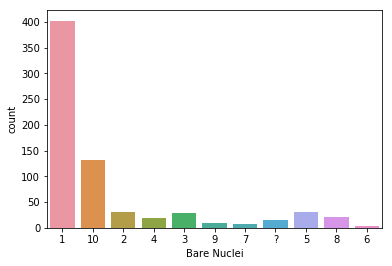

In [91]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
import seaborn as sns
sns.countplot(x=df["Bare Nuclei"]);

In [92]:
## will replce the ? value by 1 as it is there in most of the rows
df.replace(to_replace ="?", value =1,inplace=True) 

In [93]:
#checking the replace function worked correctly or not
df[pd.to_numeric(df['Bare Nuclei'], errors='coerce').isnull()]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class


In [94]:
df['Bare Nuclei'] = df[['Bare Nuclei']].apply(pd.to_numeric) 

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


In [96]:
## removing duplicates value
df[df.duplicated("ID")].count()

ID                             54
ClumpThickness                 54
Cell Size                      54
Cell Shape                     54
Marginal Adhesion              54
Single Epithelial Cell Size    54
Bare Nuclei                    54
Normal Nucleoli                54
Bland Chromatin                54
Mitoses                        54
Class                          54
dtype: int64

In [97]:
df.drop_duplicates(subset='ID',keep='first',inplace=True)

In [98]:
df.shape

(645, 11)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 

In [99]:
# Check for correlation of variable
df.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.062704,-0.044732,-0.040771,-0.066707,-0.048428,-0.094822,-0.059964,-0.055048,-0.034778,-0.080729
ClumpThickness,-0.062704,1.000000,0.644764,0.655972,0.484922,0.515168,0.588592,0.561261,0.534934,0.346201,0.724706
Cell Size,-0.044732,0.644764,1.000000,0.903802,0.711410,0.749046,0.676439,0.761042,0.728274,0.457109,0.817567
Cell Shape,-0.040771,0.655972,0.903802,1.000000,0.685744,0.712025,0.699127,0.735134,0.722408,0.434820,0.815828
Marginal Adhesion,-0.066707,0.484922,0.711410,0.685744,1.000000,0.600940,0.668669,0.665414,0.593902,0.403777,0.700035
Single Epithelial Cell Size,-0.048428,0.515168,0.749046,0.712025,0.600940,1.000000,0.575498,0.617320,0.629214,0.480421,0.678963
Bare Nuclei,-0.094822,0.588592,0.676439,0.699127,0.668669,0.575498,1.000000,0.671989,0.566675,0.330329,0.817334
Normal Nucleoli,-0.059964,0.561261,0.761042,0.735134,0.665414,0.617320,0.671989,1.000000,0.663497,0.328683,0.755289
Bland Chromatin,-0.055048,0.534934,0.728274,0.722408,0.593902,0.629214,0.566675,0.663497,1.000000,0.414202,0.710121
Mitoses,-0.034778,0.346201,0.457109,0.434820,0.403777,0.480421,0.330329,0.328683,0.414202,1.000000,0.419997


In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


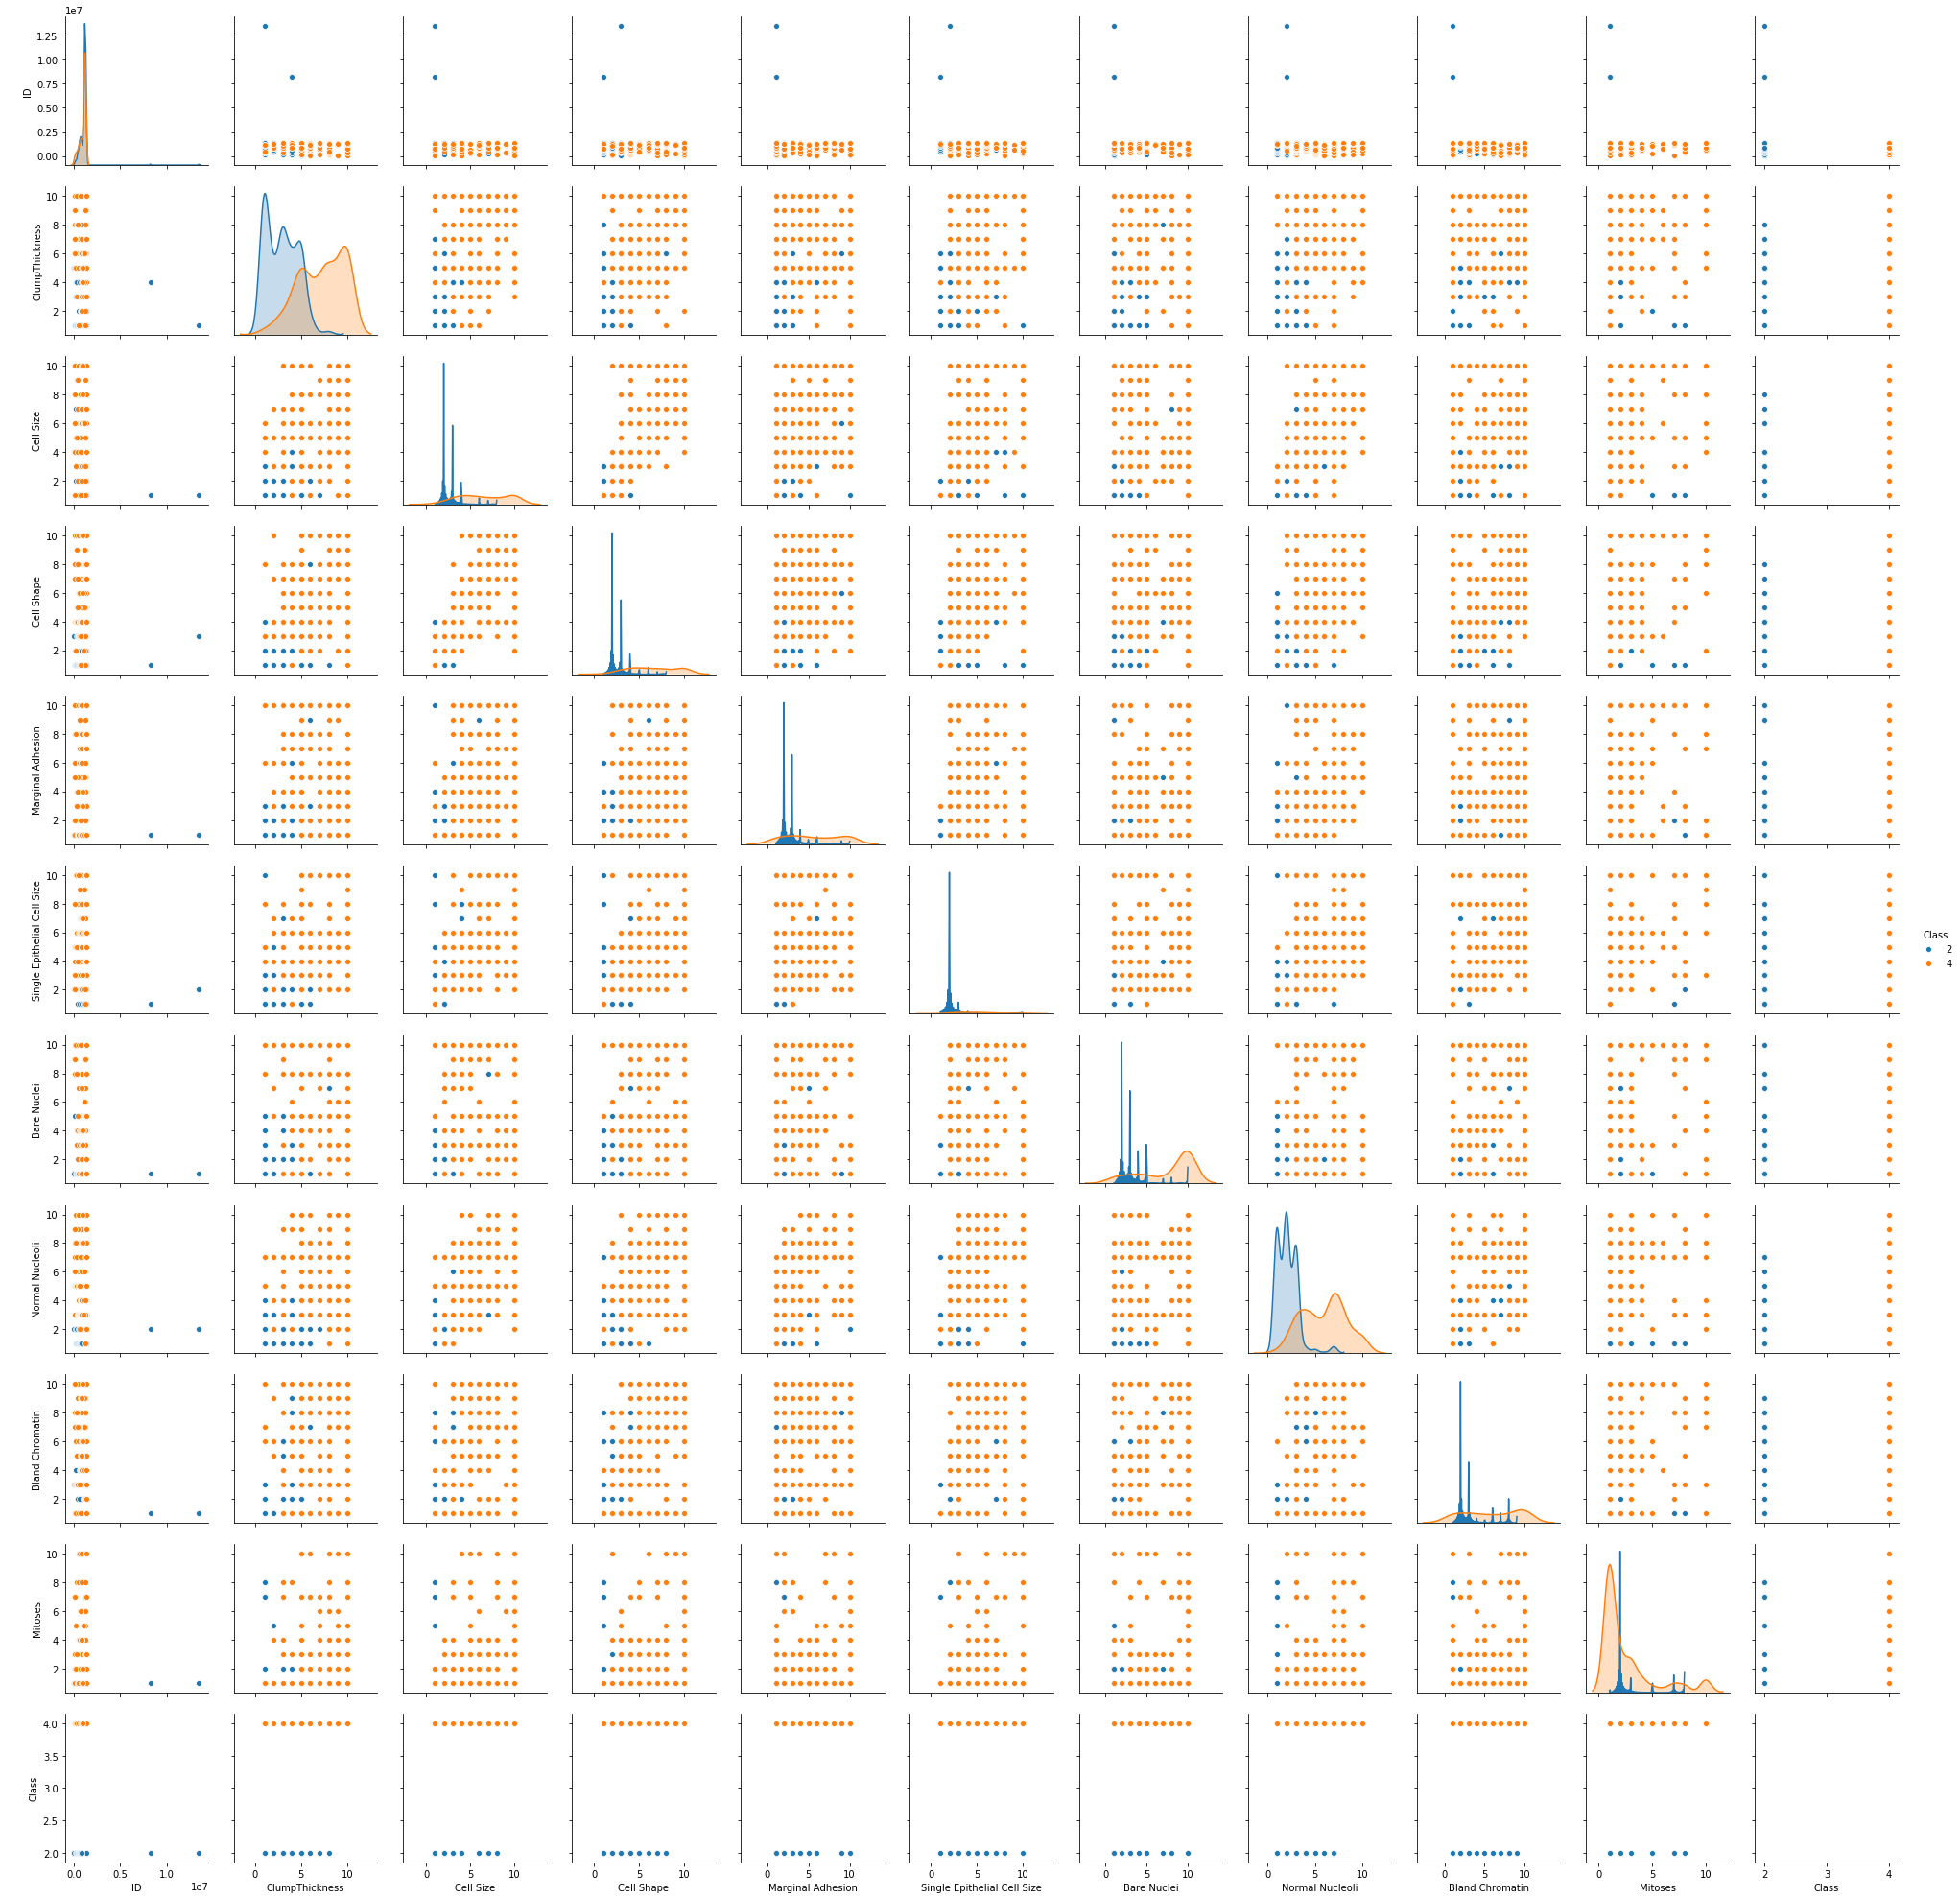

In [100]:
#Let us check for pair plots
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
sns.pairplot(df, diag_kind='kde',hue='Class')

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [101]:
df.drop(columns=["ID"],inplace=True)

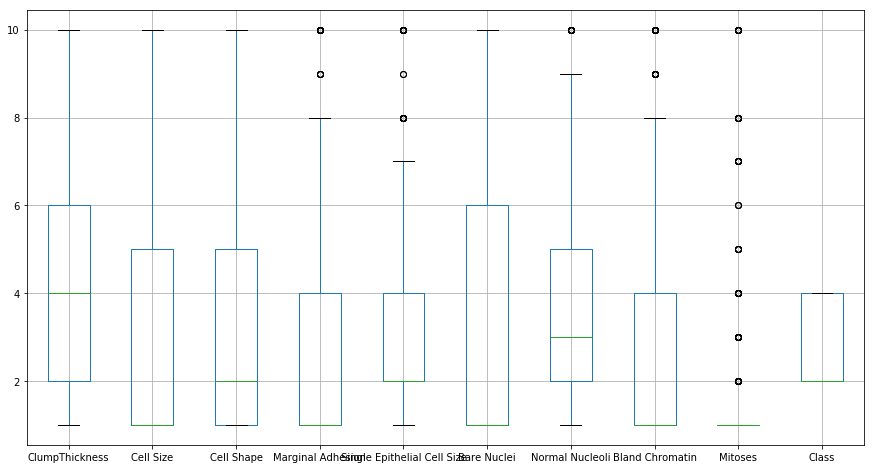

In [102]:
# We could see most of the outliers are now removed.
df.boxplot(figsize=(15,8))

In [103]:
pd.crosstab(df['Marginal Adhesion'],df["Class"])

Class,2,4
Marginal Adhesion,,
1,337,31
2,36,18
3,27,26
4,5,27
5,2,17
6,4,18
7,0,13
8,0,25
9,1,4


In [104]:
# Converting outlier to max value which is 8
df["Marginal Adhesion"]= df["Marginal Adhesion"].replace([9,10], 8) 

In [107]:
# Converting outlier to max value which is 7
df["Single Epithelial Cell Size"]= df["Single Epithelial Cell Size"].replace([8,9,10], 7)

In [108]:
# Converting outlier to max value which is 9
df["Normal Nucleoli"]= df["Normal Nucleoli"].replace([10], 9)

In [109]:
# Converting outlier to max value which is 8
df["Bland Chromatin"]= df["Bland Chromatin"].replace([9,10], 8)

In [110]:
# Converting outlier to max value which is 3
df["Mitoses"]= df["Mitoses"].replace([4,5,6,7,8,9,10], 3)

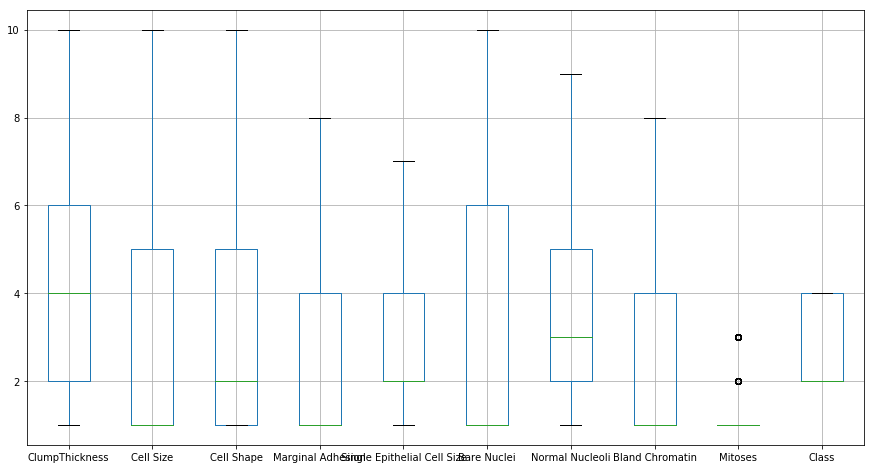

In [111]:
df.boxplot(figsize=(15,8))

In [115]:
X = df.drop(['Class'],axis=1)
y = df['Class']

In [118]:
X.shape

(645, 9)

In [119]:
y.shape

(645,)

In [120]:
# standardize the data
from sklearn.preprocessing import StandardScaler
X_sd = StandardScaler().fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Q6 Create a covariance matrix for identifying Principal components

In [121]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(X_sd.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.0015528  0.64576496 0.65699092 0.50334161 0.54450853 0.58950616
  0.56717019 0.54898751 0.42333903]
 [0.64576496 1.0015528  0.90520515 0.730464   0.78289939 0.6774891
  0.76206839 0.7333126  0.51167792]
 [0.65699092 0.90520515 1.0015528  0.70184363 0.74870207 0.70021306
  0.73646922 0.72569436 0.48137817]
 [0.50334161 0.730464   0.70184363 1.0015528  0.66093457 0.68526837
  0.68552239 0.62702942 0.45815177]
 [0.54450853 0.78289939 0.74870207 0.66093457 1.0015528  0.62099219
  0.65661166 0.68678472 0.50468257]
 [0.58950616 0.6774891  0.70021306 0.68526837 0.62099219 1.0015528
  0.68062329 0.5891953  0.43734461]
 [0.56717019 0.76206839 0.73646922 0.68552239 0.65661166 0.68062329
  1.0015528  0.67492029 0.39088098]
 [0.54898751 0.7333126  0.72569436 0.62702942 0.68678472 0.5891953
  0.67492029 1.0015528  0.47974806]
 [0.42333903 0.51167792 0.48137817 0.45815177 0.50468257 0.43734461
  0.39088098 0.47974806 1.0015528 ]]


# Q7 Identify eigen values and eigen vector

In [0]:
# Step 2- Get eigen values and eigen vector

In [122]:
e_vals, e_vecs = np.linalg.eig(cov_matrix)
#e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[ 0.30012335  0.003923    0.88347636  0.00352734 -0.0710922  -0.2302272
   0.01854055  0.24214456 -0.11104621]
 [ 0.37535874 -0.07434432 -0.04882766  0.74648616 -0.21558002  0.34242536
   0.25345611 -0.1496312  -0.20879091]
 [ 0.37044277 -0.11254028  0.03034718 -0.64482734 -0.19329089  0.55404989
   0.23259177 -0.1546197  -0.10509403]
 [ 0.33521889 -0.10511143 -0.32861471 -0.05897626  0.43278126 -0.09839845
   0.12425778  0.62646862 -0.40028647]
 [ 0.34393762  0.04426697 -0.23306624 -0.08034513 -0.28852216 -0.54770268
   0.51316032 -0.03031608  0.41412111]
 [ 0.33036225 -0.1465553   0.10713914  0.09504783  0.64373125  0.18819186
  -0.08258687 -0.14580455  0.60908438]
 [ 0.34219379 -0.2855936  -0.0982566  -0.07975443  0.078054   -0.41059001
  -0.39187536 -0.56651588 -0.36897352]
 [ 0.33566074  0.00733001 -0.17598038  0.0256813  -0.444107    0.09452577
  -0.65880609  0.36625267  0.28516114]
 [ 0.24946987  0.93042375 -0.04188886 -0.03091512  0.15116795  0.01315701
  -0.0901

# Q8 Find variance and cumulative variance by each eigen vector

Cumulative Variance Explained [ 67.31529285  74.98550416  80.93793217  86.04595562  89.76845113
  93.04098582  96.22680334  99.00622394 100.        ]


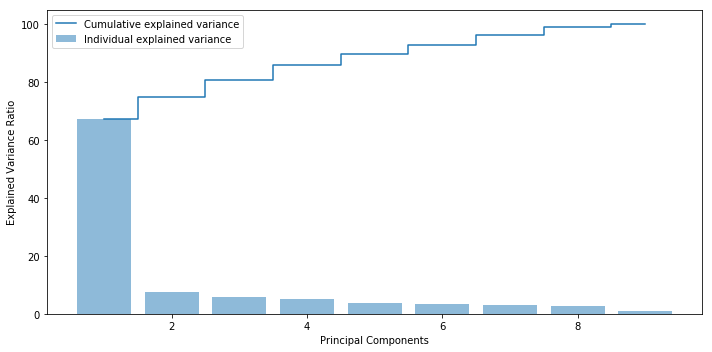

In [123]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [124]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 4 PCA dimensions (dimensionality reduction from 4 to 2)

pca = PCA(n_components=4)
data_reduced = pca.fit_transform(X_sd)
data_reduced.transpose()

array([[-1.56293411,  1.6080927 , -1.68247484, ..., -2.1647752 ,
         4.02526027,  2.16218051],
       [-0.07723483, -0.66640934, -0.12019059, ...,  0.15781795,
         0.11262184, -1.36254361],
       [-0.61956554,  0.36921313, -0.03025692, ...,  0.2262028 ,
         1.01079113,  0.7595468 ],
       [ 0.07642906, -0.82642667, -0.14996933, ...,  0.06711695,
         2.17607774,  0.61816061]])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


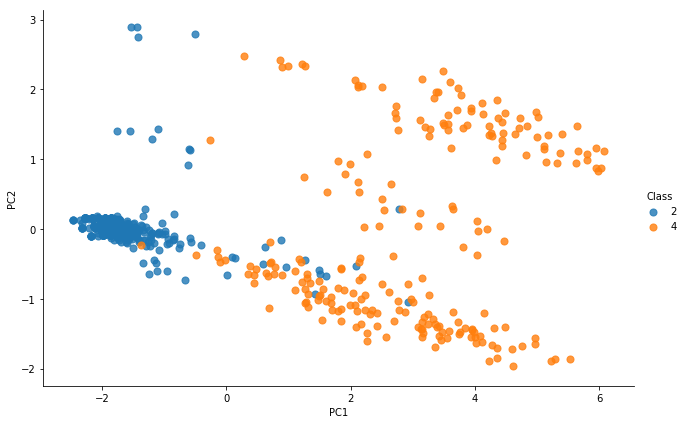

In [134]:
## Plot of PC
df["PC1"] = data_reduced[:,0]
df["PC2"] = data_reduced[:,1]
df["PC3"] = data_reduced[:,2]
df["PC4"] = data_reduced[:,3]
vis = sns.lmplot(data = df[["PC1","PC2","Class"]], x = "PC1", y = "PC2",fit_reg=False, hue = "Class",\
                 size = 6, aspect=1.5, scatter_kws = {'s':50}, )
vis.savefig("pca.png")

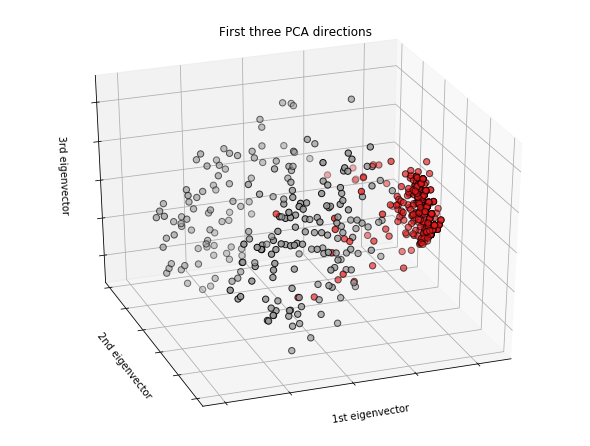

In [146]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X_sd)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [135]:
pca.components_

array([[ 0.30012335,  0.37535874,  0.37044277,  0.33521889,  0.34393762,
         0.33036225,  0.34219379,  0.33566074,  0.24946987],
       [ 0.003923  , -0.07434432, -0.11254028, -0.10511143,  0.04426697,
        -0.1465553 , -0.2855936 ,  0.00733001,  0.93042375],
       [-0.88347636,  0.04882766, -0.03034718,  0.32861471,  0.23306624,
        -0.10713914,  0.0982566 ,  0.17598038,  0.04188886],
       [ 0.0710922 ,  0.21558002,  0.19329089, -0.43278126,  0.28852216,
        -0.64373125, -0.078054  ,  0.444107  , -0.15116795]])

# Q10 Find correlation between components and features

In [136]:
df.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class,PC1,PC2,PC3,PC4
0,5,1,1,1,2,1,3,1,1,2,-1.562934,-0.077235,-0.619566,0.076429
1,5,4,4,5,7,10,3,2,1,2,1.608093,-0.666409,0.369213,-0.826427
2,3,1,1,1,2,2,3,1,1,2,-1.682475,-0.120191,-0.030257,-0.149969
3,6,8,8,1,3,4,3,7,1,2,1.487028,-0.589733,-0.452127,1.675336
4,4,1,1,3,2,1,3,1,1,2,-1.401737,-0.162105,-0.049174,-0.292250


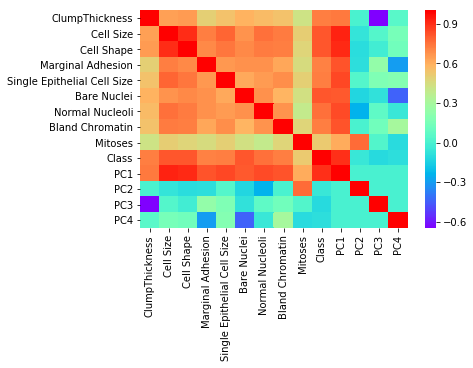

In [143]:
sns.heatmap(df.corr(),cmap='rainbow')

In [144]:
df.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class,PC1,PC2,PC3,PC4
ClumpThickness,1.000000,0.644764,0.655972,0.502561,0.543664,0.588592,0.566291,0.548136,0.422683,0.724706,7.387167e-01,3.259445e-03,-6.466410e-01,4.820251e-02
Cell Size,0.644764,1.000000,0.903802,0.729331,0.781686,0.676439,0.760887,0.732176,0.510885,0.817567,9.238993e-01,-6.176930e-02,3.573833e-02,1.461693e-01
Cell Shape,0.655972,0.903802,1.000000,0.700755,0.747541,0.699127,0.735327,0.724569,0.480632,0.815828,9.117993e-01,-9.350459e-02,-2.221195e-02,1.310567e-01
Marginal Adhesion,0.502561,0.729331,0.700755,1.000000,0.659910,0.684206,0.684460,0.626057,0.457441,0.721715,8.251000e-01,-8.733229e-02,2.405223e-01,-2.934379e-01
Single Epithelial Cell Size,0.543664,0.781686,0.747541,0.659910,1.000000,0.620029,0.655594,0.685720,0.503900,0.725771,8.465601e-01,3.677941e-02,1.705877e-01,1.956261e-01
Bare Nuclei,0.588592,0.676439,0.699127,0.684206,0.620029,1.000000,0.679568,0.588282,0.436667,0.817334,8.131460e-01,-1.217661e-01,-7.841813e-02,-4.364679e-01
Normal Nucleoli,0.566291,0.760887,0.735327,0.684460,0.655594,0.679568,1.000000,0.673874,0.390275,0.761614,8.422679e-01,-2.372867e-01,7.191675e-02,-5.292280e-02
Bland Chromatin,0.548136,0.732176,0.724569,0.626057,0.685720,0.588282,0.673874,1.000000,0.479004,0.723877,8.261876e-01,6.090173e-03,1.288050e-01,3.011170e-01
Mitoses,0.422683,0.510885,0.480632,0.457441,0.503900,0.436667,0.390275,0.479004,1.000000,0.520055,6.140394e-01,7.730467e-01,3.065963e-02,-1.024961e-01
Class,0.724706,0.817567,0.815828,0.721715,0.725771,0.817334,0.761614,0.723877,0.520055,1.000000,9.025449e-01,-5.007367e-02,-1.125006e-01,-8.879666e-02


# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [172]:
jokes = pd.read_csv("C:\\Ishan\\Greatlearning\\Labs\\5. 1 Nov\\jokes.csv")

In [173]:
jokes.head(5)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [174]:
ratings=jokes.iloc[0:200,1:101]

In [175]:
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [176]:
ratings.shape

(200, 100)

# Q13 Change the column indices from 0 to 99

In [177]:
ratings.columns=range(100)

In [178]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [179]:
ratings.replace(99, 0,inplace=True)

In [180]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [181]:
ratings_transpose=ratings.T

In [182]:
ratings_transpose.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-7.82,4.08,0.00,0.00,8.50,-6.17,0.00,6.84,-3.79,3.01,...,3.54,4.47,8.06,1.84,-9.71,5.73,1.80,2.62,0.00,5.58
1,8.79,-0.29,0.00,8.35,4.61,-3.54,0.00,3.16,-3.54,5.15,...,-6.70,-0.19,3.45,-2.23,-8.25,0.00,5.39,-3.79,0.00,-7.28
2,-9.66,6.36,0.00,0.00,-4.17,0.44,0.00,9.17,-9.42,5.15,...,-4.76,1.55,3.69,5.49,-8.30,-0.58,8.06,-1.17,0.00,-4.56
3,-8.16,4.37,0.00,0.00,-5.39,-8.50,0.00,-6.21,-6.89,3.01,...,0.00,-1.50,-1.36,5.49,-2.62,1.75,-0.10,-0.44,0.00,2.67
4,-7.52,-2.38,9.03,1.80,1.36,-7.09,8.59,-8.16,-8.74,6.41,...,-8.16,-4.42,3.93,4.37,-8.93,2.86,4.81,-1.02,7.91,7.38


In [191]:
from sklearn.preprocessing import StandardScaler
ratings_diff = StandardScaler().fit_transform(ratings_transpose)

In [192]:
ratings_diff

array([[-0.92720712,  0.27457908, -0.7878666 , ...,  1.24899421,
        -0.30733439,  0.91467957],
       [ 1.98941099, -0.62510643, -0.7878666 , ..., -1.22567595,
        -0.30733439, -1.89065773],
       [-1.25030027,  0.74398021, -0.7878666 , ..., -0.2141883 ,
        -0.30733439, -1.29730489],
       ...,
       [ 0.44593879, -0.49540349, -0.7878666 , ..., -0.04432015,
        -0.30733439, -0.30256632],
       [ 0.44593879, -1.45479352, -0.7878666 , ...,  0.51933328,
        -0.30733439, -0.30256632],
       [ 0.44593879, -0.34511277, -0.7878666 , ...,  0.40737472,
        -0.30733439, -0.30256632]])

In [193]:
ratings_diff.shape

(100, 200)

In [198]:
ratingmean=ratings_diff.mean(axis=1)

In [199]:
ratingmean

array([-0.00750712, -0.04599906, -0.10707627, -0.32946024, -0.17790901,
        0.14416335, -0.14245948, -0.2529505 , -0.14446555,  0.07500963,
        0.12692589,  0.13623836, -0.49106203,  0.30513406, -0.57306865,
       -0.92386158, -0.49712044, -0.37160086, -0.11704844, -0.39704547,
        0.44163283,  0.07538555, -0.1050732 , -0.42382901, -0.02252966,
        0.08707342,  0.60972362,  0.10289024,  0.6642304 , -0.35885747,
        0.50249102,  0.52189075, -0.19274273,  0.07743073,  0.69230389,
        0.75197178, -0.29936982,  0.0751037 ,  0.05124105, -0.01323282,
       -0.21815835,  0.37486252, -0.29597156, -0.45711105, -0.03619337,
        0.31489334,  0.17736473,  0.18280502,  0.5320071 ,  0.87821678,
       -0.22012481, -0.02494807,  0.73670016,  0.31614636,  0.05310318,
        0.41407327, -0.39348134, -0.7217115 , -0.19241029, -0.16650425,
        0.39273193,  0.55754984, -0.08241105, -0.37911416,  0.49532245,
        0.39250225, -0.19756691,  0.40890015,  0.47513885, -0.06

In [201]:
ratingmean.shape

(100,)

In [203]:
ratings_transpose["ratingmean"]=ratingmean

In [204]:
ratings_transpose.head(5)

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,ratingmean
0,-7.82,4.08,0.00,0.00,8.50,-6.17,0.00,6.84,-3.79,3.01,...,4.47,8.06,1.84,-9.71,5.73,1.80,2.62,0.00,5.58,-0.007507
1,8.79,-0.29,0.00,8.35,4.61,-3.54,0.00,3.16,-3.54,5.15,...,-0.19,3.45,-2.23,-8.25,0.00,5.39,-3.79,0.00,-7.28,-0.045999
2,-9.66,6.36,0.00,0.00,-4.17,0.44,0.00,9.17,-9.42,5.15,...,1.55,3.69,5.49,-8.30,-0.58,8.06,-1.17,0.00,-4.56,-0.107076
3,-8.16,4.37,0.00,0.00,-5.39,-8.50,0.00,-6.21,-6.89,3.01,...,-1.50,-1.36,5.49,-2.62,1.75,-0.10,-0.44,0.00,2.67,-0.329460
4,-7.52,-2.38,9.03,1.80,1.36,-7.09,8.59,-8.16,-8.74,6.41,...,-4.42,3.93,4.37,-8.93,2.86,4.81,-1.02,7.91,7.38,-0.177909


### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [212]:
ratings_transpose["ratingmean"].sort_values(ascending=False).head(10)

49    0.878217
35    0.751972
52    0.736700
34    0.692304
28    0.664230
26    0.609724
61    0.557550
48    0.532007
31    0.521891
30    0.502491
Name: ratingmean, dtype: float64